# ICE-5 Machine learning with image features

## (Tutorial) Image Gradients
The difference in value between neighboring pixels is called an image gradient.<br>
We'll learn how to compute the image gradients with the following codes

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import copy
from PIL import Image
from skimage.feature import hog
from skimage import data, color, exposure
import cv2

In [ ]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())

In [ ]:
### Compute the horizontal gradient using the centered 1D filter.
### This is equivalent to replacing each non-border pixel with the
### difference between its right and left neighbors. The leftmost
### and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [ ]:
### Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

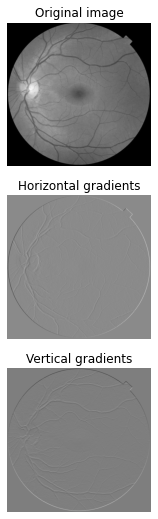

In [ ]:
### Matplotlib incantations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

## Task 1. Design your code to compute diagonal gradient of the image used in the example and visualize it

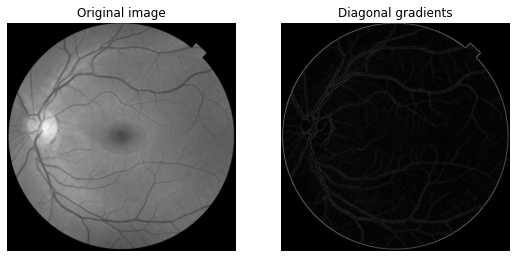

In [ ]:
image = color.rgb2gray(data.retina())

gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

gd = np.sqrt(np.square(gx) + np.square(gy))

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(9, 14), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gd, cmap=plt.cm.gray)
ax2.set_title('Diagonal gradients')
ax2.set_adjustable('box')

## **Question 1**. Explain why we don't directly use the simplest image features (color or number of pixels)

**Answer to Q1**: Because images with the same shape, color, and number of pixels may exist, isolating the fundamental features does not aid in image interpretation. As a result, in order to enhance image recognition, we must extract more complex components such as edges, corners, ridges, and crucial areas, among others.


---

## (Tutorial) HOG image features

In [ ]:
# read image and convert it to grayscale
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

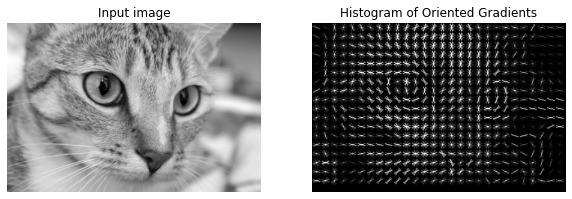

In [ ]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## Task 2. ORB keypoints extraction and visualization
Apart from HOG image features, another popular image feature is ORB.<br>
Please extract keypoints from the image used in HOG example using on ORB features and visualize the keypoints on the original image

Text(0.5, 1.0, 'Keypoints With Size and Orientation')

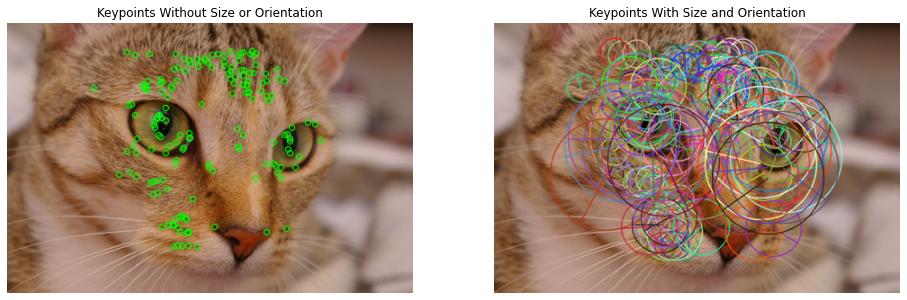

In [ ]:
# write your code here
image = data.chelsea()

orb = cv2.ORB_create(200, 2.0)

keypoints, descriptor = orb.detectAndCompute(image, None)
keyp_without_size = copy.copy(image)
keyp_with_size = copy.copy(image)

# Draw the keypoints on image 
cv2.drawKeypoints(image, keypoints, keyp_without_size, color = (0, 255, 0))
# Draw the keypoints with size and orientation on the other copy of image
cv2.drawKeypoints(image, keypoints, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,11), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(keyp_without_size)
ax1.set_title('Keypoints Without Size or Orientation')

ax2.axis('off')
ax2.imshow(keyp_with_size)
ax2.set_title('Keypoints With Size and Orientation')

## (Tutorial) Bag-of-Visual-Words
In the tutorial code, we create the code words only based on one image

In [ ]:
# defining feature extractor that we want to use (ORB feature used in this extractor)
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [ ]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [ ]:
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
img = data.chelsea()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

Text(0.5, 1.0, 'The histogram of visual words')

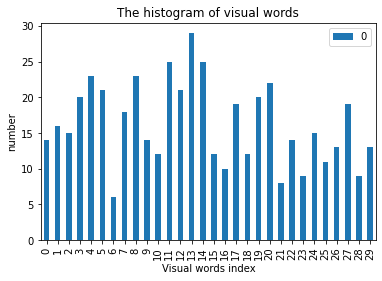

In [ ]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Task 3. Bag-of-Visual-Words for multiple images
Create your bag-of-visual-words with 10 images and visualize the histogram of visual words. The 10 images belong to one category(dog, cat, bike, etc.)

In [ ]:
!pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gagansairamanvesh","key":"82eacaed499b0d3c6e207ff6221e4f8f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d prasunroy/natural-images

 99% 340M/342M [00:05<00:00, 77.9MB/s]
100% 342M/342M [00:05<00:00, 65.3MB/s]


In [ ]:
! unzip -q /content/natural-images.zip

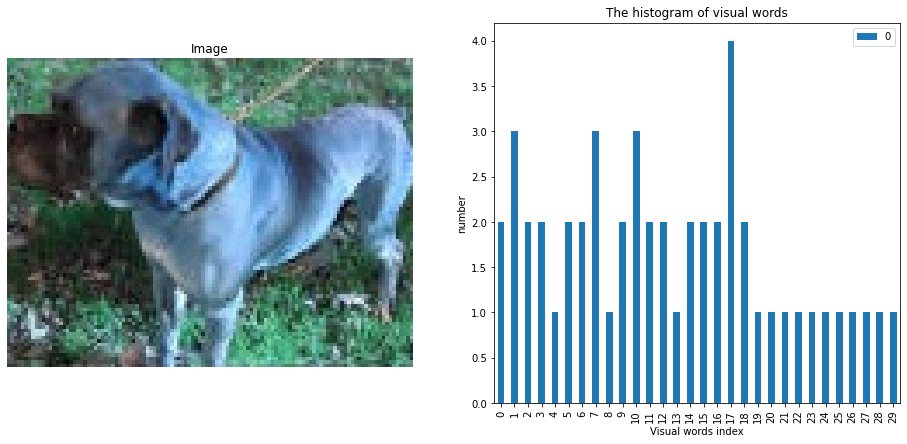

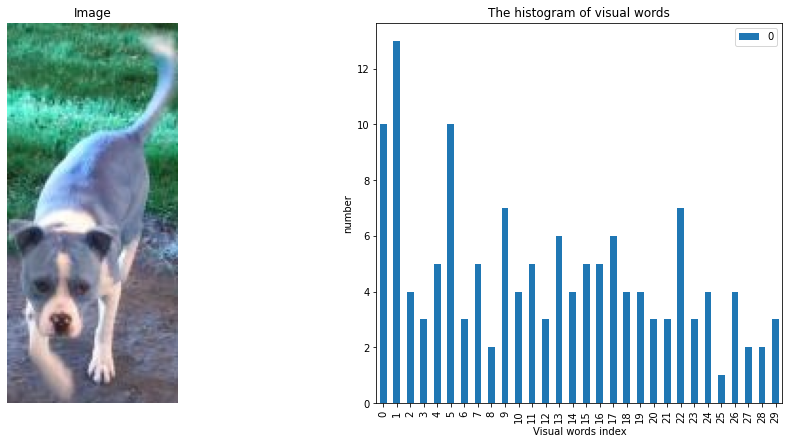

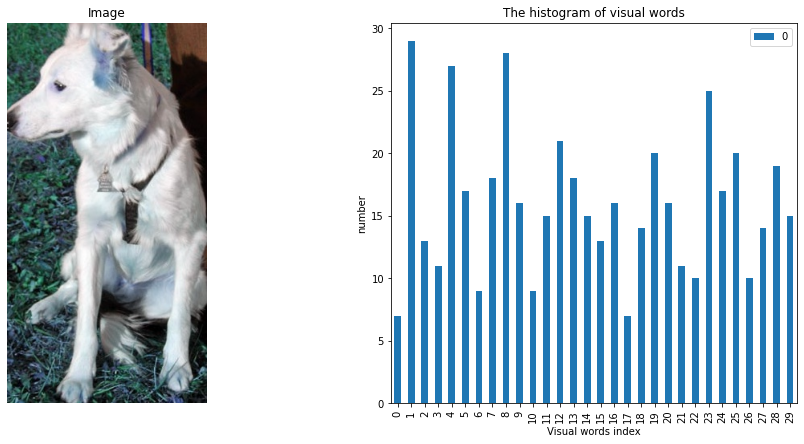

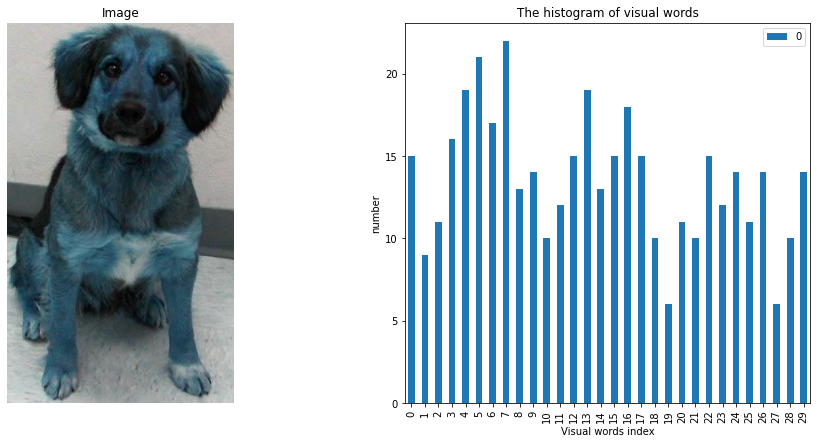

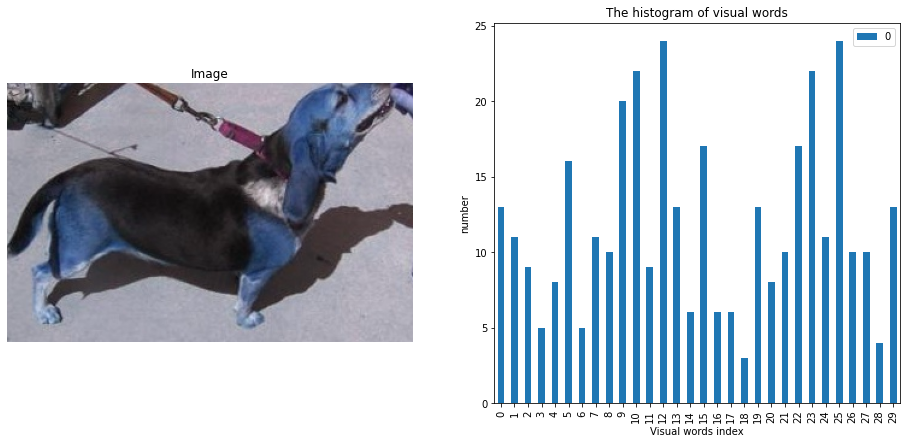

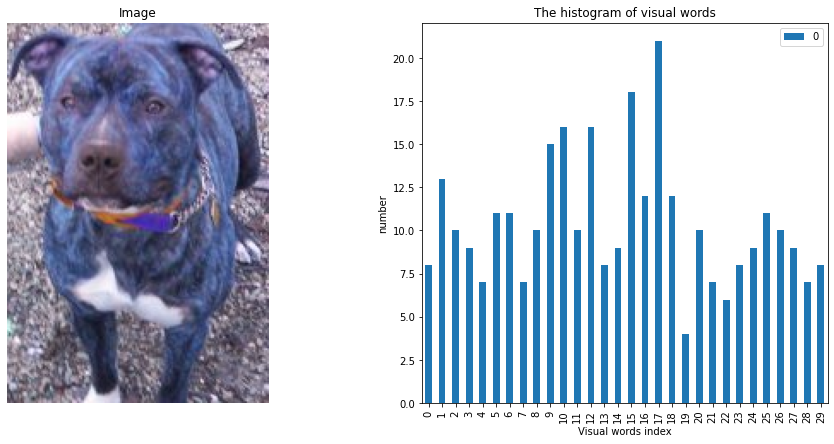

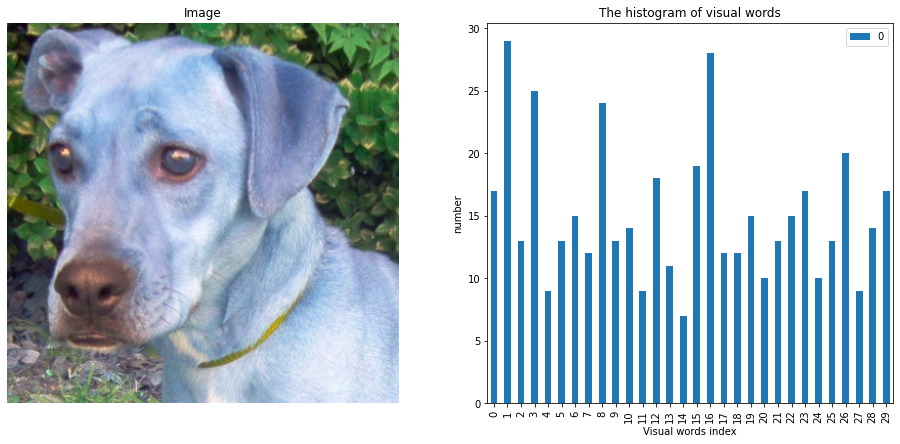

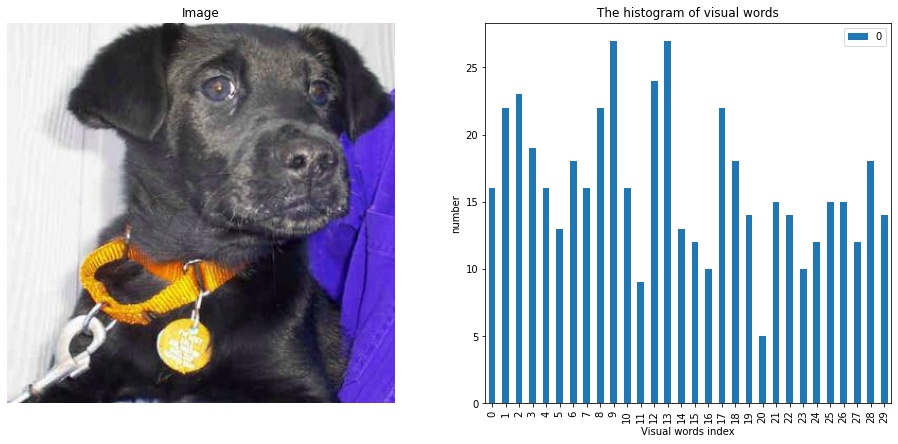

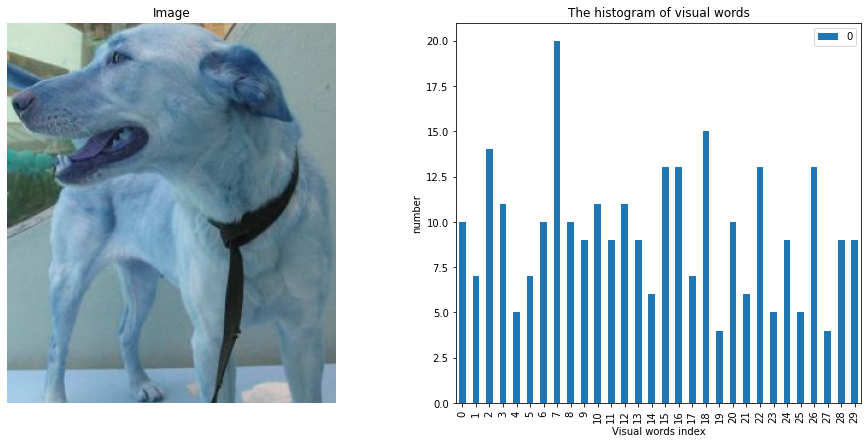

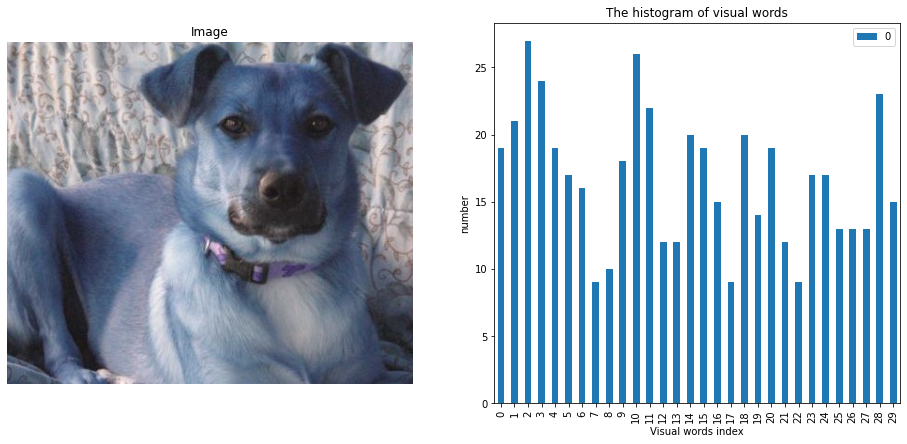

In [ ]:
# wirte your code here
from sklearn.cluster import KMeans

def features(image_path):
    image = cv2.imread(image_path)
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

def bag_of_words_for_multiple_images(final_df):
  preprocessed_image = []
  for row in final_df.itertuples():
    image_path = row.image_path

    kmeans = KMeans(n_clusters = 30)
    kp, descriptor_list = features(image_path)
    kmeans.fit(descriptor_list)

    keypoint, descriptor = features(image_path)
    if (descriptor is not None):
      histogram = build_histogram(descriptor, kmeans)
      preprocessed_image.append(histogram)

  return preprocessed_image

image_path = ["/content/natural_images/dog/dog_0000.jpg",
          "/content/natural_images/dog/dog_0001.jpg",
          "/content/natural_images/dog/dog_0002.jpg",
          "/content/natural_images/dog/dog_0003.jpg",
          "/content/natural_images/dog/dog_0004.jpg",
          "/content/natural_images/dog/dog_0005.jpg",
          "/content/natural_images/dog/dog_0006.jpg",
          "/content/natural_images/dog/dog_0007.jpg",
          "/content/natural_images/dog/dog_0008.jpg",
          "/content/natural_images/dog/dog_0009.jpg"]

dataset_list = list(zip(image_path))
final_df = pd.DataFrame(dataset_list,columns = ['image_path'])

def visualizing_bag_of_words(preprocessed_image = bag_of_words_for_multiple_images(final_df)):
  for n in range(0,len(preprocessed_image)):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
    
    ax1.axis('off')
    ax1.imshow(cv2.imread(image_path[n]))
    ax1.set_title('Image')

    df = pd.DataFrame(preprocessed_image[n])
    df.plot(ax=ax2, kind='bar');
    
    ax2.set_xlabel('Visual words index')
    ax2.set_ylabel('number')
    ax2.set_title('The histogram of visual words')

    plt.show()

visualizing_bag_of_words()

## Question 2. Recall that the feature scaling does not have a large effect on classification accuracy (tf-idf). How about the effect of feature scaling in Bag-of-Visual-Words? Explain it.

**Answer to Q2**: 

The words with the most repetitions are given more weight in Bag of Words. For example, if terms like "is", "the," and other words have a higher count than words that truly have a context, we can utilize feature scaling to give more emphasis to words with more repetition that do not reflect the true content of the sentence.


---



**BOW(w. d)** ,where w is word and di is document

In the case of tf-idf, however, the focus is on words that add more meaning to the sentence rather than the number of repeat words. It looks for the number of words divided by the number of documents that include this term.


---



**TF-IDF (w, d)= BOW(w, d)* N** ,where, N represents is total number of documents

Consider the word "s" to have the highest count in tf-id. Then it is compared to other documents in which this word appears; for example, if N=9 documents and the word "is" appears in 9 of those documents, then 9/10=0.9, showing that it is repeated frequently. Furthermore, if the value is close to one, it indicates that it appears in a significant number of documents.

---